In [33]:
import os
import cv2
import torch
import torchvision
import numpy as np
import io
import base64
from IPython.display import HTML
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

In [2]:
from pytorch_implementation_new_way import WebMDataset
from pytorch_implementation_new_way import VideoFolder
from pytorch_implementation_new_way import MultiColumn
from pytorch_implementation_new_way import ComposeMix, RandomCropVideo, UnNormalize
from pytorch_implementation_new_way import load_json_config

 > Using device: cuda
 > Active GPU ids: [0]


In [3]:
config = {
    "model_name": "3D_model",
    "output_dir": "trained_models/",

    "input_mode": "av",

    "data_folder": "D:/something-something-project/data/videos/20bn-something-something-v2/",

    "json_data_train": "D:/something-something-project/data/train_data.json",
    "json_data_val": "D:/something-something-project/data/validation_data.json",
    "json_data_test": "D:/something-something-project/data/something-something-v2-test.json",

    "json_file_labels": "D:/something-something-project/data/something-something-v2-mylabels.json",

    "num_workers": 5,

    "num_classes": 4,
    "batch_size": 30,
    "clip_size": 72,
    
    "nclips_train": 1,
    "nclips_val": 1,

    "upscale_factor_train": 1.4,
    "upscale_factor_eval": 1.0,

    "step_size_train": 1,
    "step_size_val": 1,

    "lr": 0.008,
    "last_lr": 0.00001,
    "momentum": 0.9,
    "weight_decay": 0.00001,
    "num_epochs": -1,
    "print_freq": 100,

    "conv_model": "D:/something-something-project/smth-smth-v2-baseline-with-models/trained_models/pretrained.model3D_1",
    "input_spatial_size": 84,

    "column_units": 512,
    "save_features": True
}

In [5]:
# Center crop videos during evaluation
transform_eval_pre = ComposeMix([
        [torchvision.transforms.ToPILImage(), "img"],
        [torchvision.transforms.CenterCrop(config['input_spatial_size']), "img"]
         ])

transform_post = ComposeMix([
        [torchvision.transforms.ToTensor(), "img"]
    ])

val_data = VideoFolder(root=config['data_folder'],
                       json_file_input=config['json_data_val'],
                       json_file_labels=config['json_file_labels'],
                       clip_size=config['clip_size'],
                       nclips=config['nclips_val'],
                       step_size=config['step_size_val'],
                       is_val=True,
                       transform_pre=transform_eval_pre,
                       transform_post=transform_post,
                       get_item_id=True,
                       )
dict_two_way = val_data.classes_dict

In [7]:
dict_two_way

{'Dropping something': 0,
 0: 'Dropping something',
 'Holding something': 1,
 1: 'Holding something',
 'Poking something': 2,
 2: 'Poking something',
 'Tearing something': 3,
 3: 'Tearing something'}

In [8]:
len(val_data)

3217

In [9]:
selected_indx = np.random.randint(len(val_data))
print (selected_indx)

462


In [10]:
input_data, target, item_id = val_data[selected_indx]

D:\capstone-project-2\experiment\pytorch_implementation_new_way.py:745: AttributeRenamedWarning: VideoFrame.to_nd_array is deprecated; please use VideoFrame.to_ndarray.
  imgs = [f.to_rgb().to_nd_array() for f in reader.decode(video=0)]


In [12]:
print (input_data, target, item_id)

tensor([[[[0.6235, 0.6078, 0.5490,  ..., 0.5882, 0.5961, 0.6000],
          [0.6157, 0.6039, 0.5490,  ..., 0.5882, 0.5961, 0.6000],
          [0.6078, 0.5961, 0.5647,  ..., 0.5922, 0.6000, 0.6000],
          ...,
          [0.7098, 0.7098, 0.7098,  ..., 0.0745, 0.2549, 0.4392],
          [0.7098, 0.7098, 0.7098,  ..., 0.0706, 0.3333, 0.4706],
          [0.7098, 0.7098, 0.7098,  ..., 0.0980, 0.3490, 0.4745]],

         [[0.5961, 0.5961, 0.6000,  ..., 0.5686, 0.5608, 0.5608],
          [0.5922, 0.5882, 0.5922,  ..., 0.5647, 0.5569, 0.5608],
          [0.5843, 0.5843, 0.5882,  ..., 0.5608, 0.5569, 0.5608],
          ...,
          [0.6745, 0.6745, 0.6745,  ..., 0.2706, 0.0902, 0.0902],
          [0.6745, 0.6745, 0.6745,  ..., 0.2078, 0.0745, 0.1216],
          [0.6745, 0.6745, 0.6745,  ..., 0.1490, 0.0667, 0.1569]],

         [[0.6078, 0.6039, 0.5922,  ..., 0.5725, 0.5686, 0.5647],
          [0.6078, 0.6039, 0.5922,  ..., 0.5725, 0.5686, 0.5608],
          [0.6157, 0.6039, 0.5961,  ..., 0

In [13]:
input_data = input_data.unsqueeze(0)
print("Id of the video sample = {}".format(item_id))
print("True label --> {} ({})".format(target, dict_two_way[target]))

Id of the video sample = 52630
True label --> 0 (Dropping something)


In [14]:
input_data

tensor([[[[[0.6235, 0.6078, 0.5490,  ..., 0.5882, 0.5961, 0.6000],
           [0.6157, 0.6039, 0.5490,  ..., 0.5882, 0.5961, 0.6000],
           [0.6078, 0.5961, 0.5647,  ..., 0.5922, 0.6000, 0.6000],
           ...,
           [0.7098, 0.7098, 0.7098,  ..., 0.0745, 0.2549, 0.4392],
           [0.7098, 0.7098, 0.7098,  ..., 0.0706, 0.3333, 0.4706],
           [0.7098, 0.7098, 0.7098,  ..., 0.0980, 0.3490, 0.4745]],

          [[0.5961, 0.5961, 0.6000,  ..., 0.5686, 0.5608, 0.5608],
           [0.5922, 0.5882, 0.5922,  ..., 0.5647, 0.5569, 0.5608],
           [0.5843, 0.5843, 0.5882,  ..., 0.5608, 0.5569, 0.5608],
           ...,
           [0.6745, 0.6745, 0.6745,  ..., 0.2706, 0.0902, 0.0902],
           [0.6745, 0.6745, 0.6745,  ..., 0.2078, 0.0745, 0.1216],
           [0.6745, 0.6745, 0.6745,  ..., 0.1490, 0.0667, 0.1569]],

          [[0.6078, 0.6039, 0.5922,  ..., 0.5725, 0.5686, 0.5647],
           [0.6078, 0.6039, 0.5922,  ..., 0.5725, 0.5686, 0.5608],
           [0.6157, 0.6039

In [15]:
input_var = [torch.autograd.Variable(input_data)]

In [18]:
input_var

[tensor([[[[[0.6235, 0.6078, 0.5490,  ..., 0.5882, 0.5961, 0.6000],
            [0.6157, 0.6039, 0.5490,  ..., 0.5882, 0.5961, 0.6000],
            [0.6078, 0.5961, 0.5647,  ..., 0.5922, 0.6000, 0.6000],
            ...,
            [0.7098, 0.7098, 0.7098,  ..., 0.0745, 0.2549, 0.4392],
            [0.7098, 0.7098, 0.7098,  ..., 0.0706, 0.3333, 0.4706],
            [0.7098, 0.7098, 0.7098,  ..., 0.0980, 0.3490, 0.4745]],
 
           [[0.5961, 0.5961, 0.6000,  ..., 0.5686, 0.5608, 0.5608],
            [0.5922, 0.5882, 0.5922,  ..., 0.5647, 0.5569, 0.5608],
            [0.5843, 0.5843, 0.5882,  ..., 0.5608, 0.5569, 0.5608],
            ...,
            [0.6745, 0.6745, 0.6745,  ..., 0.2706, 0.0902, 0.0902],
            [0.6745, 0.6745, 0.6745,  ..., 0.2078, 0.0745, 0.1216],
            [0.6745, 0.6745, 0.6745,  ..., 0.1490, 0.0667, 0.1569]],
 
           [[0.6078, 0.6039, 0.5922,  ..., 0.5725, 0.5686, 0.5647],
            [0.6078, 0.6039, 0.5922,  ..., 0.5725, 0.5686, 0.5608],
        

In [20]:
vs = cv2.VideoCapture("D:\\something-something-project\\data\\videos\\20bn-something-something-v2\\25020.webm")

In [21]:
# path_to_vid = os.path.join(config["data_folder"], item_id + ".webm")
path_to_vid = "D:\\something-something-project\\data\\videos\\20bn-something-something-v2\\25020.webm"
video = io.open(path_to_vid, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

In [22]:
(grabbed, frame) = vs.read()

In [23]:
grabbed

True

In [25]:
type(frame)

numpy.ndarray

In [34]:
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
frame = cv2.resize(frame, (224, 224))
frame = img_to_array(frame)

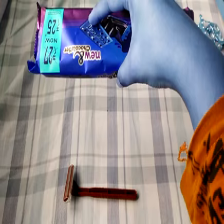

In [36]:
array_to_img(frame)

In [37]:
def selective_search(image, method="fast"):
    # initialize OpenCV's selective search implementation and set the input image
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    ss.setBaseImage(image)
    
    # check to see if we are using "fast" but "less accurate" version of selective search
    if method == "fast":
        ss.switchToSelectiveSearchFast()
        
    # otherwise we are using "slower" but "more accurate" version
    else:
        ss.switchToSelectiveSearchQuality()
        
    # run selective search on the input image
    rects = ss.process()
    
    # return the region proposal bounding boxes
    return rects

In [38]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.preprocessing.image import img_to_array
from imutils.object_detection import non_max_suppression
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [39]:
class DictX(dict):
    def __getattr__(self, key):
        try:
            return self[key]
        except KeyError as k:
            raise AttributeError(k)

    def __setattr__(self, key, value):
        self[key] = value

    def __delattr__(self, key):
        try:
            del self[key]
        except KeyError as k:
            raise AttributeError(k)

    def __repr__(self):
        return '<DictX ' + dict.__repr__(self) + '>'

In [40]:
args = DictX ({
    "image": "./beagle.png", # location of image
    "method": "fast",          # ["fast", "slow"]
    "conf": "0.9",             # minimum probabilty to consider a classification/detection
    "filter": "biscuit"             # comma separated list of ImageNet labels to filter on
})

In [41]:
# grab label filters
labelFilters = args.filter

# if the label filter is not empty, break it into a list
if labelFilters is not None:
    labelFilters = labelFilters.lower().split(",")

In [42]:
# load ResNet (with weights pre-trained on ImageNet)
print ("Loading ResNet...")
model = ResNet50(weights="imagenet")

Loading ResNet...


In [43]:
(H, W) = frame.shape[:2]

In [44]:
print ("performing selective search with '{}' method".format(args.method))
rects = selective_search(frame, method=args.method)
print ("{} regions found by selective search".format(len(rects)))

# initialize the list of region proposals that we'll be classifying
# along with their associated bounding boxes
proposals = []
boxes = []

performing selective search with 'fast' method
455 regions found by selective search


In [45]:
# loop over the region proposal bounding box coordinates generated by
# running selective search
for (x, y, w, h) in rects:
    # if the width or height of the region is less than 10% of the
    # image width or height, ignore it (i.e., filter out small
    # objects that are likely false-positives)
    if w/float(W) < 0.1 or h/float(H) < 0.1:
        continue
        
    # extract the region from the input image, convert it from BGR to
    # RGB channel ordering, and them resize it to 224x224 (the input
    # dimesnsion required by our pretrained CNN)
    roi = frame[y:y+h, x:x+w]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(roi, (224, 224))
    
    # further processing by the ROI
    roi = img_to_array(roi)
    roi = preprocess_input(roi)
    
    # update our proposals and bounding boxes lists
    proposals.append(roi)
    boxes.append((x, y, w, h))

In [46]:
# convert the proposals list into numpy array and show its dimensions
proposals = np.array(proposals)
print ("Proposal shape: {}".format(proposals.shape))

# classify each of the proposal ROIs using ResNet and then decode the
# predictions
print ("Classifying proposals...")
preds = model.predict(proposals)
preds = imagenet_utils.decode_predictions(preds, top=1)

# initialize a dictionary which maps class labels (keys) to any
# bounding box associated with that label (values)
labels = {}

Proposal shape: (281, 224, 224, 3)
Classifying proposals...


In [50]:
# loop over the predictions
for (i, p) in enumerate(preds):
    # grab the prediction information for the current region proposal
    (imagenetID, label, prob) = p[0]
    
    # only if the label filters are not empty "and" the label does not
    # exist in the list, then ignore it
    
    # try to look for label which we are interested in, else find the label with highest probability
#     if labelFilters is not None and label not in labelFilters:
#         continue
    
    # filter out weak detections by ensuring the predicted probability
    # is greater than the minimum probability
    if prob >= float(args.conf):
        # grab the bounding box associated with the prediction and
        # convert the coordinates
        (x, y, w, h) = boxes[i]
        box = (x, y, x + w, y + h)
        
        # grab the list of predictions for the label and add the
        # bounding box + probability to the list
        L = labels.get(label, [])
        L.append((box, prob))
        labels[label] = L

In [51]:
labels

{'oboe': [((197, 16, 224, 50), 0.91012543)],
 'harp': [((31, 73, 117, 119), 0.9359211), ((119, 84, 180, 114), 0.98411465)],
 'handkerchief': [((64, 77, 118, 188), 0.9460646),
  ((72, 87, 118, 191), 0.9491842)],
 'bobsled': [((0, 0, 76, 224), 0.9018462)]}

In [82]:
image_frames = []

for label in labels.keys():
    print("[INFO] showing results for '{}'".format(label))
    clone = frame.copy()
    # extract the bounding boxes and associated prediction
    # probabilities, then apply non-maxima suppression
    boxes = np.array([p[0] for p in labels[label]])
    proba = np.array([p[1] for p in labels[label]])
    boxes = non_max_suppression(boxes, proba)
    # loop over all bounding boxes that were kept after applying
    # non-maxima suppression
    print (proba)
    print (boxes)
    for (startX, startY, endX, endY), prob in zip(boxes, proba):
        # draw the bounding box and label on the image
        cv2.rectangle(clone, (startX, startY), (endX, endY),
            (0, 255, 0), 2)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.putText(clone, label + " {0:.0%}".format(prob), (startX, y),
            cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 255, 0), 2)
    
    image_frames.append(clone)
    # show the output after apply non-maxima suppression
    # cv2.imshow("After", clone)
    # cv2.waitKey(0)
#     plt.imshow(clone)
# plt.show(block=True)

[INFO] showing results for 'oboe'
[0.91012543]
[[197  16 224  50]]
[INFO] showing results for 'harp'
[0.9359211  0.98411465]
[[119  84 180 114]
 [ 31  73 117 119]]
[INFO] showing results for 'handkerchief'
[0.9460646 0.9491842]
[[ 72  87 118 191]]
[INFO] showing results for 'bobsled'
[0.9018462]
[[  0   0  76 224]]


In [83]:
len(image_frames)

4

In [84]:
print ("{0:.0%}".format(0.3414))

34%


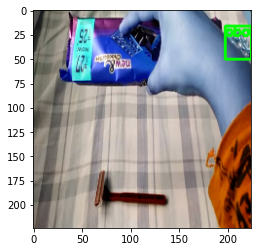

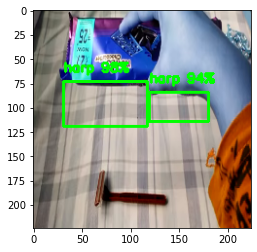

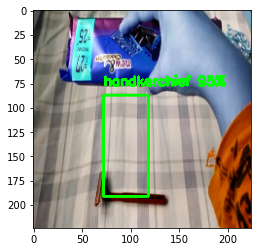

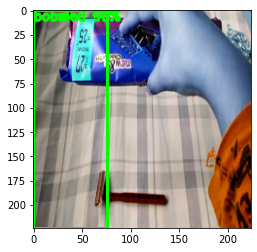

In [85]:
from tkinter import *
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline


for img in image_frames:
    plt.figure()
    plt.imshow(array_to_img(img))
    plt.show()